<h3>
<font color = 'blue'>
Compounded Annual Growth Rate - A Deep Dive
</font>
</h3>

In [1]:
import pandas as pd

### Absolute Returns ###

In [2]:
amount   = [10000, 12000, 13000, 14000, 20000]

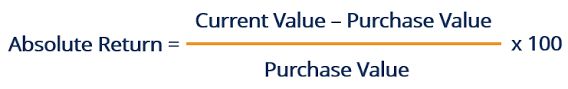


In [3]:
absolute_returns = (20000-10000)/10000*100
absolute_returns

100.0

In [4]:
absolute_returns = (14000-10000)/10000*100
absolute_returns

40.0

### CAGR (Compounded Annual Growth Rate) ###

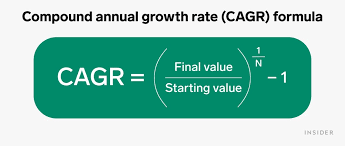

In [5]:
yr = [0,1,2,3,4]

In [6]:
df = pd.DataFrame(zip(amount, yr), columns=['amount', 'yr'])
df

,amount,yr
0,10000,0
1,12000,1
2,13000,2
3,14000,3
4,20000,4


In [8]:
def get_cagr(final_value, starting_value, N) :
    return ((final_value/starting_value)**(1/N)-1)

In [12]:
((12000/10000)**(1/1)-1), ((13000/10000)**(1/2)-1), ((14000/10000)**(1/3)-1),  ((20000/10000)**(1/4)-1)

(0.19999999999999996,
 0.14017542509913805,
 0.1186889420813968,
 0.18920711500272103)

In [9]:
starting_value = 10000
df['cagr'] = [  0 if N==0 else get_cagr(final_value, starting_value, N) for final_value, N in zip(df.amount, df.yr)]

In [10]:
df

,amount,yr,cagr
0,10000,0,0.000000
1,12000,1,0.200000
2,13000,2,0.140175
3,14000,3,0.118689
4,20000,4,0.189207


<font color='blue'> 
A major drawback of the CAGR is that it smooths out the growth rate and thus hides the volatility of the actual growth in the amount of capital
</font>

In [17]:
((13000/12000)**(1/1)-1)*100

8.333333333333325

In [18]:
((20000/14000)**(1/1)-1)*100

42.85714285714286

In [19]:
((14000/13000)**(1/1)-1)*100

7.692307692307687

In [13]:
amt = 10000
a = [10000]
cagr= .189207
years = 4
for i in range(1,years+1 ) :
    amt = amt*(1+cagr)   # compounding 
    a.append(amt)   
print(f'On an average the principal amount grew @ {cagr*100}% over 4 years : \n{a}')    

On an average the principal amount grew @ 18.9207% over 4 years : 
[10000, 11892.07, 14142.132888489998, 16817.923425922523, 19999.992263571043]


In [20]:
amt = 10000
a = [10000]
cagr= .118689
years = 3
for i in range(1,years+1 ) :
    amt = amt*(1+cagr)  # compounding
    a.append(amt)   
print(f'On an average the principal amount grew @ {cagr*100}% over 4 years : \n{a}')  

On an average the principal amount grew @ 11.8689% over 4 years : 
[10000, 11186.890000000001, 12514.650787210001, 14000.00217449317]


### Compound Interest Formula ###

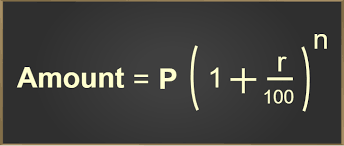

In [27]:
def get_ci(starting_value, cagr, n) :
#    return starting_value*(1+cagr)**n-starting_value
# or, in case we want to store principal + interest 
    return starting_value*(1+cagr)**n

In [28]:
df['yearly_ci'] = df.apply(lambda row: get_ci(starting_value, row[2], row[1]), axis=1)
df

,amount,yr,cagr,yearly_ci
0,10000,0,0.000000,10000.0
1,12000,1,0.200000,12000.0
2,13000,2,0.140175,13000.0
3,14000,3,0.118689,14000.0
4,20000,4,0.189207,20000.0


In [29]:
(10000*(1+.2)**1)

12000.0

In [26]:
(10000*(1+.2)**1)-10000

2000.0